# Determinants of Popular Songs 

# Frederic Barz, Franca Boeglin and Emile Champagne 

# 23/05/2020

# 1. Introduction 

Spotify users can listen to more than 50 million songs on spotify (Statista, 2020). Listening as well as publishing music has never been so easy. However, out of these millions of songs, only a small amount of songs belongs to the most streamed songs of all time. This raises the question, how a popular song differentiates from an unpopular song.

This project aimgs to take on an aggreagate and holistic approach, in order to pin down, which factors determine to be the most important, determine popular songs. The period studied is 2010 - 2019 and the number of songs observed is 603. This paper aims at providing further insights what drive song popularity over time. In addition, Machine Learning is employed in order to assess the predictive power of our holistic model. 

The remainder of this report is structured as follows: First, the research question and overall objectivities with this report are stated. The second part describes the set-up (libraries, packages) for this project as well as provides the user with a better understanding of the data. Third, an exploratory analysis, respectively a univariate and bivariate analysis of the data was conducted prior to the main analysis. The following main part contains an interactive part, our methodogical approach as well as the results. In the end, concluding remarks are made. 

## 1.1 Research Questions

The focus of this group project is on determinants of popular songs. In particular, the paper analyses which sound characteristics explain the popularity of different songs. The project futher investigates in the dynamics of the factors across time (2010 - 2019). That is, the main focus is a study of multivariate correlations. Also, in order to further assess the relative importance of various factors and their predictive power, prediction analysis is performed in a Machine Learning setting. In addition, the project provides an interactive part, which enables the user of this project to interact with the data. Therefore, our group project adresses the following questions: 
 * Are there hidden patterns in the data regarding the different characteristics of a track? 
 * Which determinants explain the popularity of songs? 
 * Have any dynamics changed over time? 


# 2. Set-Up and Data Understanding

## 2.1 Dataset

The dataset is calles Top10s and is retrieved from kaggle. You can download the dataset by using the following link https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year. 

## 2.2 Libraries and Packages 

* **Numpy**: Numpy is a general array-processing package. 
* **Pandas**: The python software package Pandas is used for multiple tasks. The packages provides many series and dataframes. It helps organizing, exploring, representing and manipulating the data. 
* **Matplotlib**: The library Mathplotlib is used to plot 2-dimensionals graphs and plots. It is further used to manipulate different characteristics of plots. 
* **Searborn**: Seaborn is a data visualization library based on matplotlib. It is used for drawing attractive and informative graphics. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## 2.3 Read in the data  

First, the function "read_csv" reads the comma-separated-values (csv) file "top10a.csv" into a dataframe using pandas. In addition, the parsing engine "python" is used to fix parse errors. The engine parameter changes the reading function internally to a slower but more stable method. 

In [ ]:
df = pd.read_csv('top10s.csv', engine='python') # Reading the csv file using pandas, set engine parameter to python to avoid parse errors. 
df # print dataframe to get a glimpse on the dataset. 

## 2.4 Data Understanding 

### 2.4.1 Data Quality 

Regarding data quality, factors such as the amount, completeness, objectivity and timelinessplay an important role. The dataset contains 603 observation, which should be enough to achive the defined objectives. As can be seen in the following output, there is no missing data. Further, objectivity and timeliness can be ensured since the data represents what spotify users listen on spotify from 2010 until 2019. To sum up, there are no issues regarding data quality.  

In [3]:
print(df.shape) # Calculate the number of rows and columns: 15 columns and 603 rows 
df.isna().sum() # looking for missing value, there is no null data for any column 

(603, 15)


Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

## 2.5 Data 

The different sound characteristics derive from spotify. First, the different datatypes are inspected. The output shows that the dataset consists of categorical and numeric data. After the inspection, the different variables used for the analyzes are desrcibed. 

In [4]:
print(df.dtypes) # inspect datatypes 

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object


#### 2.5.1 Dependent and independent variables

The datasets consists of the following categorical and numeric variables: 

* *title*: Title of the song
* *artist*: Artist of the song 
* *top genre*: Genre of the track
* *year*: Release of the recording  
* *bmp*: Beats per minute/ Tempo (bmp)
* *nrgy*: Energy 
* *dnce*: Danceability 
* *dB*: Loudness (dB)
* *live*: Liveness 
* *val*: Valence 
* *dur*: Duration (milliseconds)
* *acous*: Acousticness 
* *spch*: Speechiness
* *pop*: Popularity

# 3. Exploratory Analysis 

## 3.1 Univariate Analysis  

The third part of this project consists of an univariate and bivariate analysis. The univariate analysis aims to provide a better understanding of the dataset. Regarding the categorical variables different barcharts are plotted to compare discrete categories. The height of each bars are proportional to the values they represent and therefore give a first insight on how the data is distributed. Regarding the numeric variables descriptive statistics as well as histograms give a detailed view and understanding of the distribution. 

### 3.1.1 Categorical Variables 

**Frequence of Genre**: In total, the dataset contains 50 different genres. The following plot shows the different genres on the x-axis and the number of songs belonging to a genre on the y-axis. As can be seen, the dataset consists of many genres. However, the majority of songs belongs to the dance pop genre. The majority of genres counts only a few number of songs. Note: this plot counts for the whole time period (2010-2019)

In [14]:
df["top genre"].nunique()

50

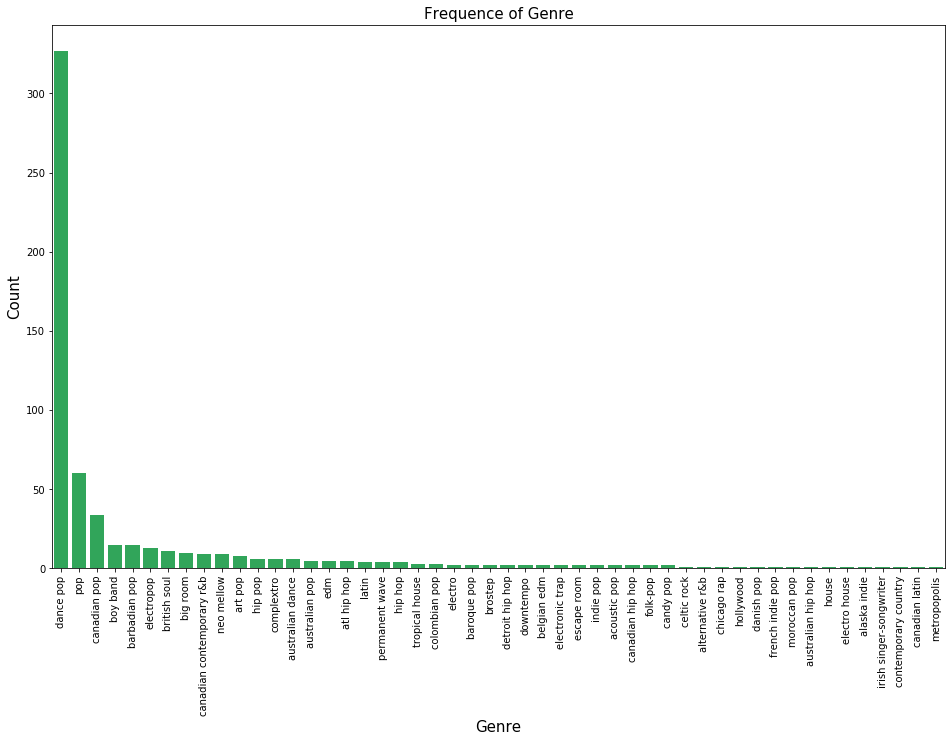

In [5]:
plt.figure(figsize = (16, 10)) # create a figure using matplotlib and set the figure size 
sn.countplot(x = "top genre", data = df, color = "#1DB954", order = df['top genre'].value_counts().index) # using seaborn to create a countplot, define variables, dataset and color, descending order  
plt.ylabel("Count", fontsize = 15) # set title on the y-axis
plt.xlabel("Genre", fontsize = 15) # set title on the x-axis 
plt.xticks(rotation="vertical") # rotate the title for better visualization 
plt.title("Frequence of Genre", fontsize = 15) # set title 
plt.show() # show plot 

Since we have so many different genres, we want to have a deeper look how many belong to a certain genres in percentage. Therefore we plot a pie chart to see the percentual distribution. The plot shows that most songs belong to a certain pop genres. In particular, most songs belong to the dance pop genres. 

Text(0.5, 1.0, 'Top 10 genre in percentage')

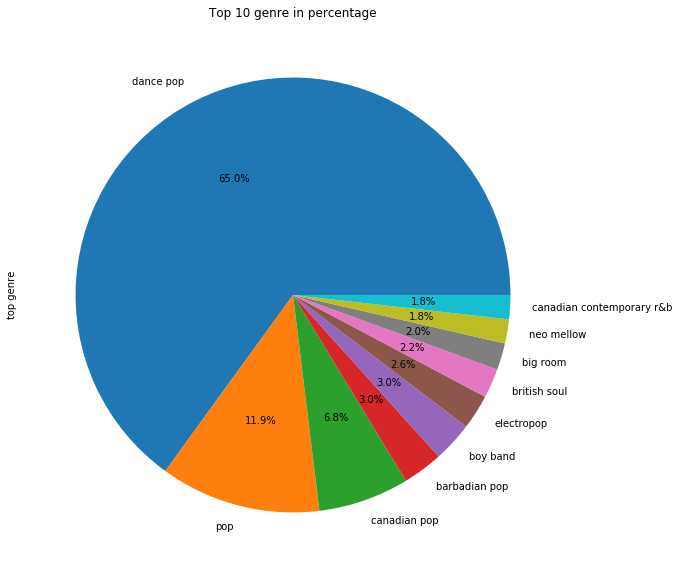

In [24]:
df["top genre"].value_counts().head(10).plot.pie(figsize=(16,10), autopct='%1.1f%%') #taking the top 10 genres to plot a piechart of size 16,10, further we use autopct to display the percent values  
plt.title("Top 10 genre in percentage") # define the title 

In [8]:
df["top genre"].value_counts().head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
Name: top genre, dtype: int64

**Frequence of Genre in 2010**: As can be seen in the plot below, a smaller number of genres are present in 2010. However, the majority of songs belong still to the dance pop genre. 

In [15]:
genre2010 = df["year"]==2010 #creating a boolean variable and check if the variable of interest contains the entry of interest 
gen2010 = df[genre2010] # no we use this boolean variable to filter the spotify dataframe 

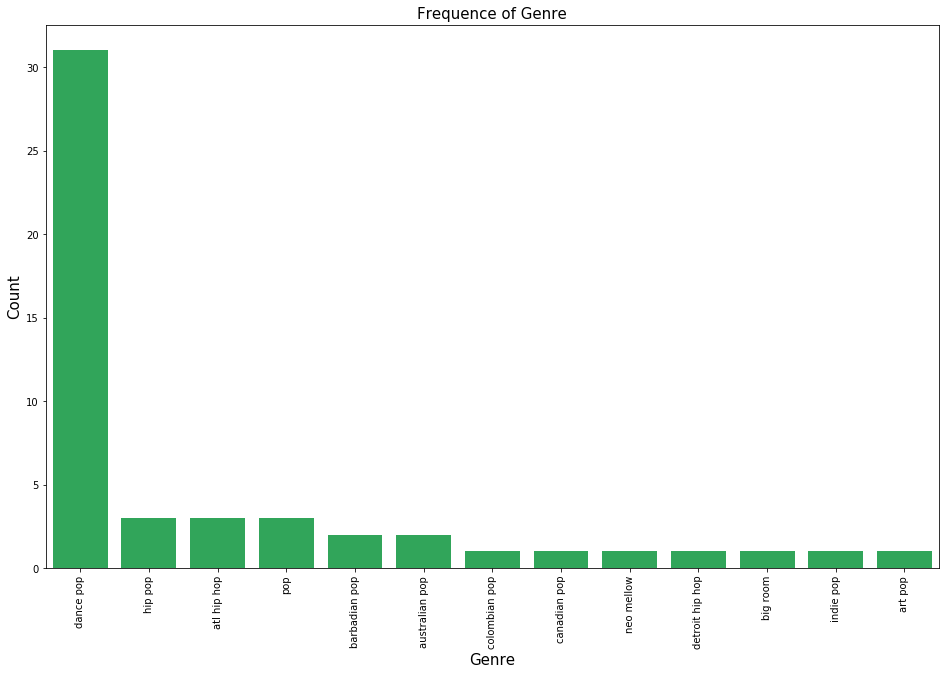

In [16]:
plt.figure(figsize = (16, 10)) # create a figure using matplotlib and set the figure size 
sn.countplot(x = "top genre", data = gen2010, color = "#1DB954", order = gen2010['top genre'].value_counts().index) # using seaborn to create a countplot, define variables, dataset and color, descending order  
plt.ylabel("Count", fontsize = 15) # set title on the y-axis
plt.xlabel("Genre", fontsize = 15) # set title on the x-axis 
plt.xticks(rotation="vertical") # rotate the title for better visualization 
plt.title("Frequence of Genre", fontsize = 15) # set title 
plt.show() 

**Frequence of Genre in 2019**:The following plot shows the number of songs belonging to a specific genres for the year 2019. As can be seen, there seems to be a shift over the years. First, there is a greate variety. Although dance pop songs are still important, the majority of songs are simple pop songs. 

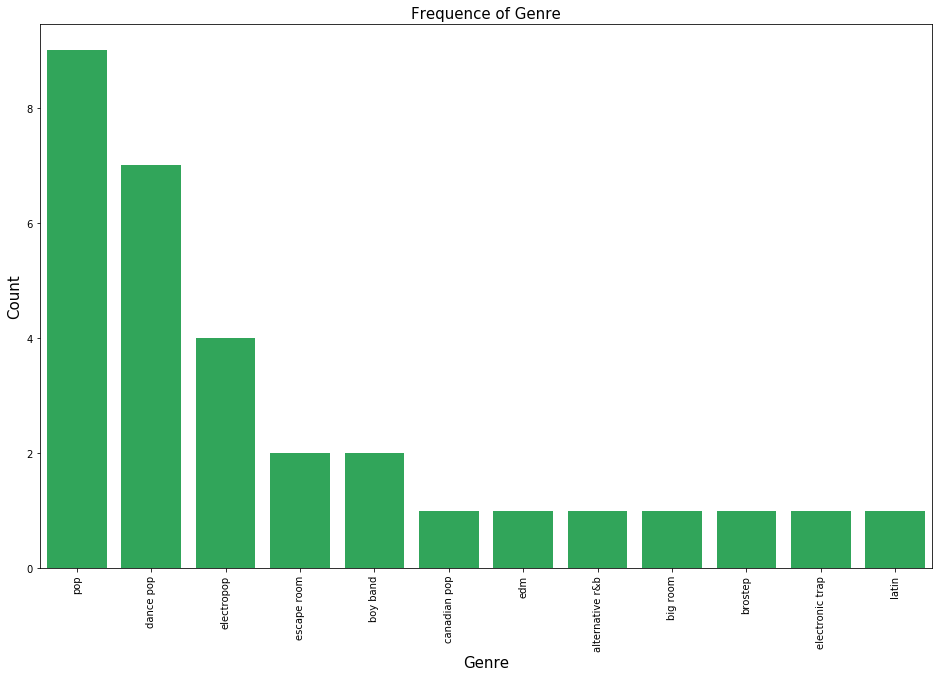

In [17]:
genre2019 = df["year"]==2019 #creating a boolean variable and check if the variable of interest contains the entry of interest 
gen2019 = df[genre2019] # no we use this boolean variable to filter the spotify dataframe 
plt.figure(figsize = (16, 10)) # create a figure using matplotlib and set the figure size 
sn.countplot(x = "top genre", data = gen2019, color = "#1DB954", order = gen2019['top genre'].value_counts().index) # using seaborn to create a countplot, define variables, dataset and color, descending order  
plt.ylabel("Count", fontsize = 15) # set title on the y-axis
plt.xlabel("Genre", fontsize = 15) # set title on the x-axis 
plt.xticks(rotation="vertical") # rotate the title for better visualization 
plt.title("Frequence of Genre", fontsize = 15) # set title 
plt.show() 

**Frequence of artists**: There are 184 artist who made it into the top charts during 2010-2019. As it does not make sense to plot all the 184 artists, we just plot the artists having the most songs in the top charts in the timeperiod 2010-2019. As we can seen Katy Perry has the most songs in the top charts followed by Justin Bieber. 

In [43]:
df["artist"].nunique() #count the number of artists in the dataset 

184

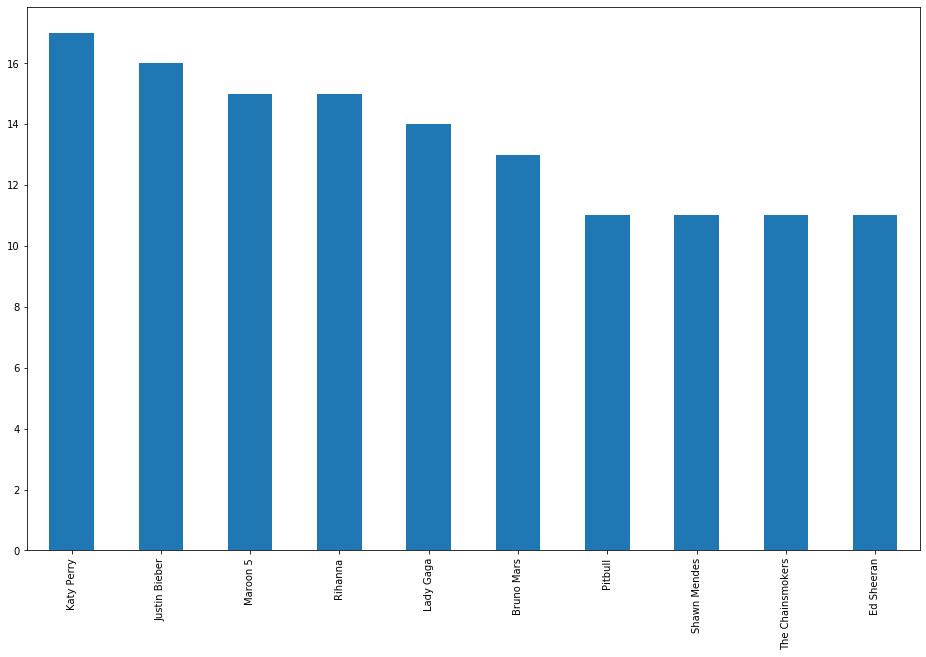

In [92]:
plt.figure(figsize = (16, 10)) # define the size of the figure 
df['artist'].value_counts().head(10).plot.bar() #plot a simple barchart with the top 10 artists having the most songs in the topchart 

### 3.1.2 Numeric Variables 

The following plot shows the descriptive statistics for the numeric variables. More details regarding each specific variables are provided in the following part. 

In [15]:
df.describe()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


**Tempo**:
Tempo describes the overall estimated tempo of a track. It is measured in beats per minute (bpm). Refering to the muscial terminology, tempo can be defines as the speed or pace of a song. The measurement derives directly from the average beat duration. The histogram below shows that the majority of songs has around 90 to 140 beats per minutes. 

Text(0.5, 1, 'Beats Per Minutes [bpm]')

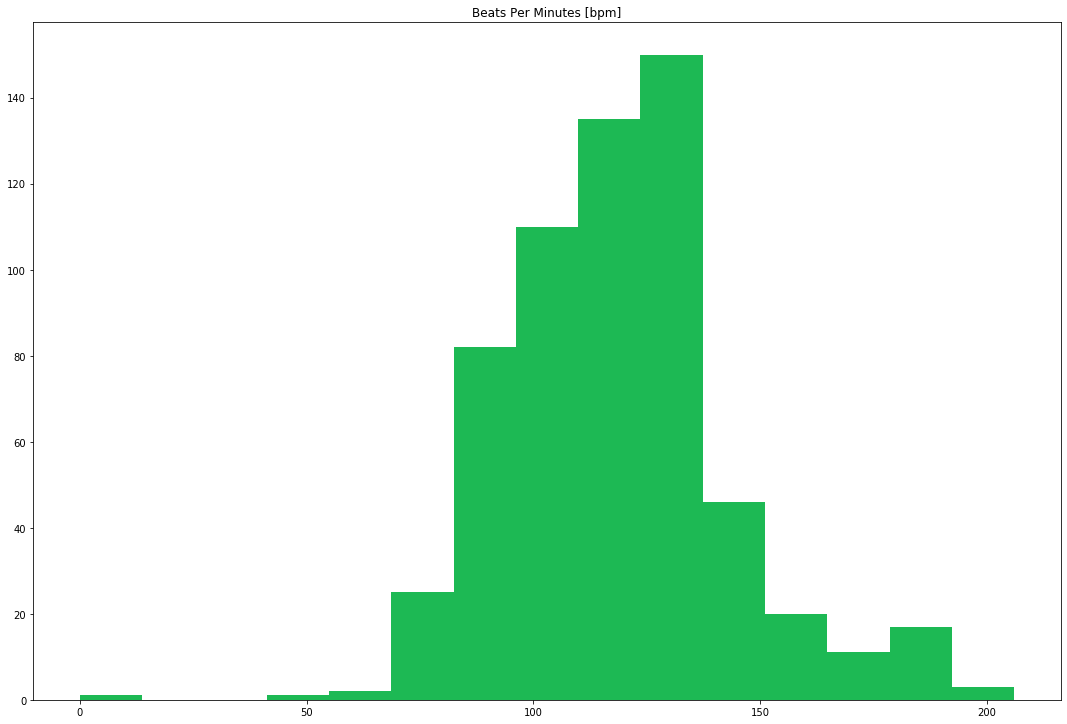

In [18]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["bpm"], bins=15, color = "#1DB954") # Plot beats per minutes, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Beats Per Minutes [bpm]") #set a title 

**Energy**:
Energy measures the perceptual intensity and activity of a song. Energy is measured from a scale from 0.0 to 1.0. Energetic songs are perceived as fast, loud and noisy. The histogram below shows that the majority of tracks in the datasat are rather energetic. 

Text(0.5, 1, 'Energy')

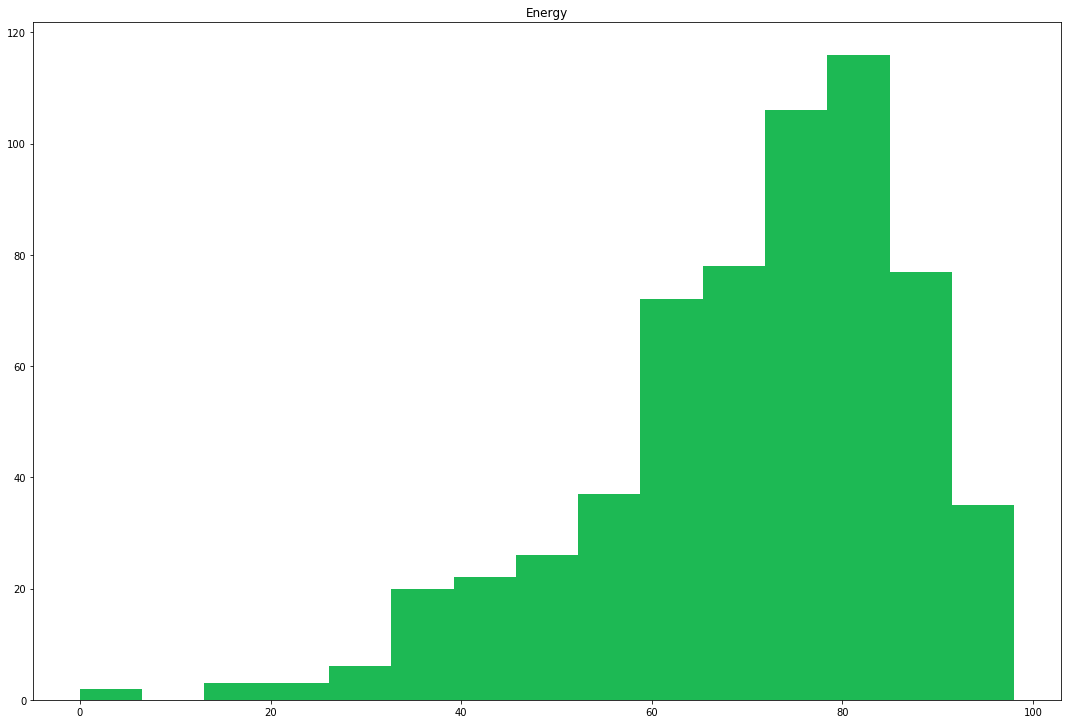

In [19]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["nrgy"], bins=15, color = "#1DB954") # Plot energy, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Energy") #set a title 

**Danceability**:
Based on a combination of musical characteristics, danceability describes how suitable a songs is for dancing. Therefore danceablity consists of elements such as tempo, rythm, stability, beat strength and overall regularity. Danceability is measured on a scale from 0.0 to 1.0, whereas 0.0 is least danceable and 1.0 is most danceable. As the plot shows, the majority of tracks in the dataset are suitable for dancing dnce (> .60). 

In [ ]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["dnce"], bins=15, color = "#1DB954") # Plot danceablity, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Danceablity") #set a title 

**Loudness**:
Loudness measures by definition how loud a specfic song is. It is measured in decibels (dB). The loudness of a track represents all values averaged across the entire song. It further represents the quality of a song that is the primary psychological correlate of amplitude in deciple. Typically, values range from -60 to 0. As can be seen in the histogram below, the majority of tracks have an average loudness close between -10 and 0. This means that the dataset contains mainly lound songs.   

Text(0.5, 1, 'Loudness')

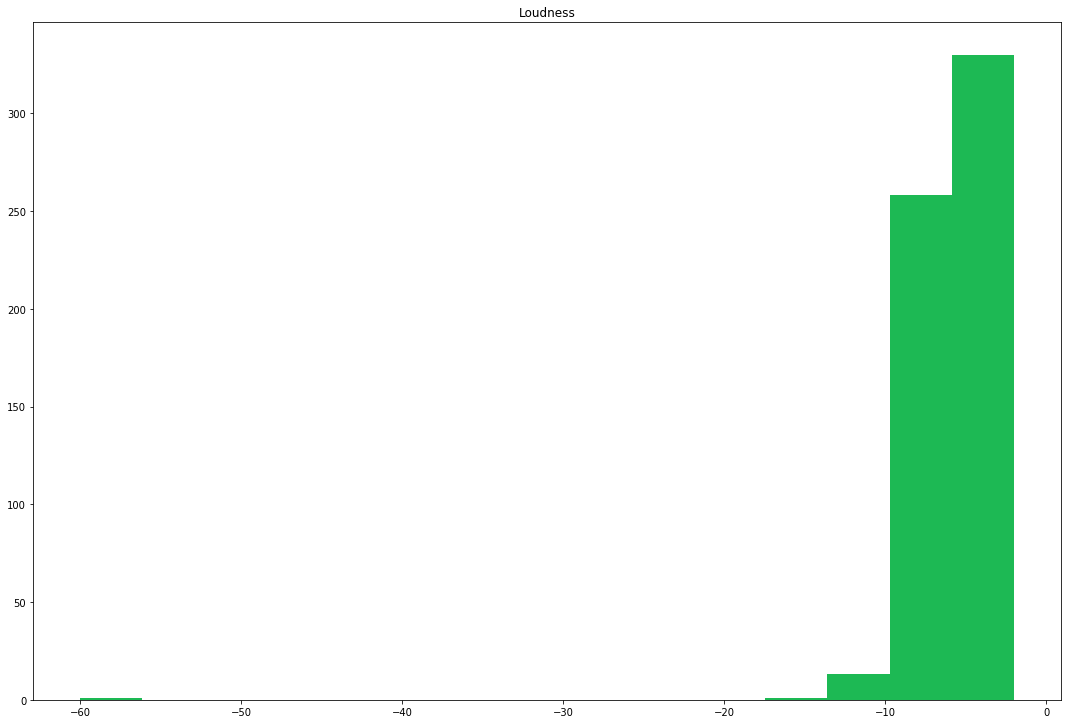

In [8]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["dB"], bins=15, color = "#1DB954") # Plot loudness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Loudness") #set a title 

**Liveness**: 
Liveness measures the propensity of live audience in the track. The higher the value for liveness, the higher the probability that the track was performed live. A value above 0.8 typcially means that a given track was performed live. As can be seen below, the majority of tracks in the dataset is not peformed live. 

Text(0.5, 1, 'Liveness')

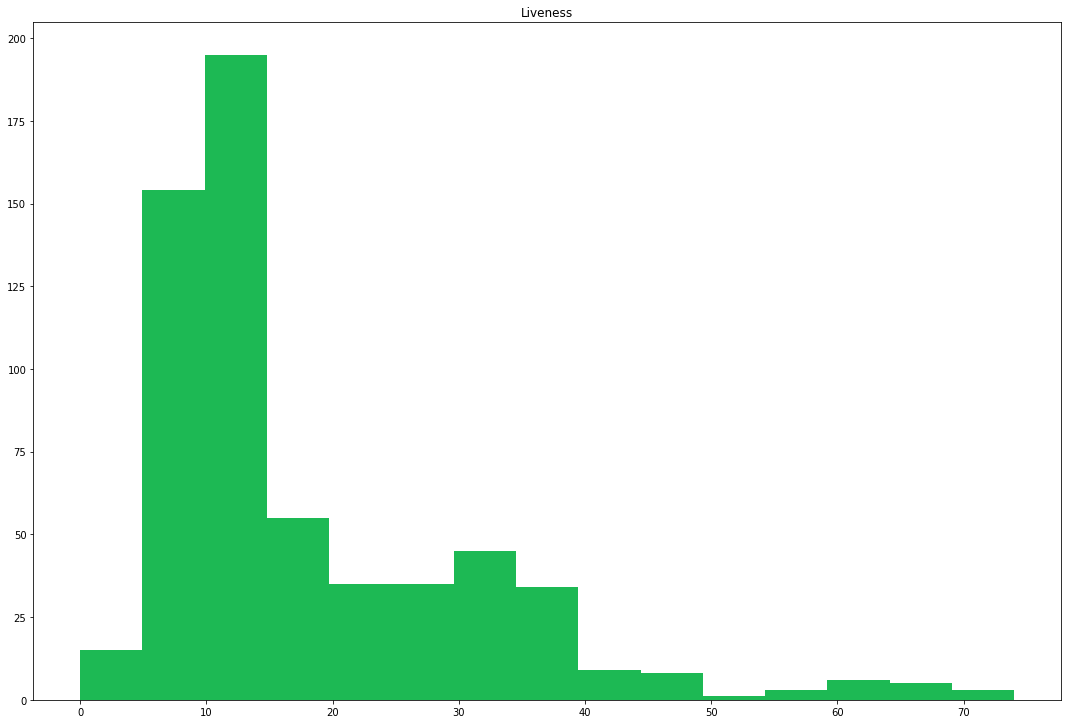

In [9]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["live"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Liveness") #set a title 

**Valence**:
Valence describes the musical positiveness of a track. Valence is measured on a scale from 0.0 to 1.0. High valence sounds more positive, whereas low valence sounds more negative. A positive tracks sounds happy, cheerful, euphoric etc. and a negativ track has more sad, depressed or angry sound characteristics. The plot shows that the songs in the dataset cover the whole spectrum of valence. The majority of songs is approximately in the middle. 

Text(0.5, 1, 'Valence')

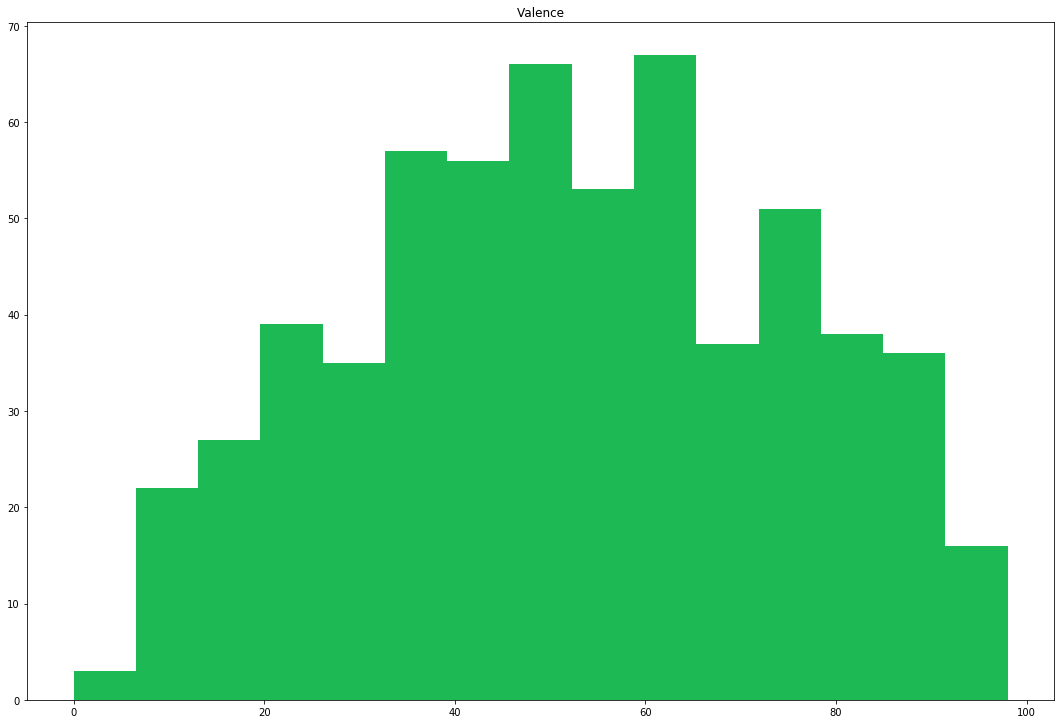

In [10]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["val"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Valence") #set a title 

**Duration**:
Duration represents the length of the song and is measured in milliseconds. The histogram shows that songs are usually between 150 and 300 seconds long. The average track is approximately 223 seconds long. 

Text(0.5, 1, 'Duration')

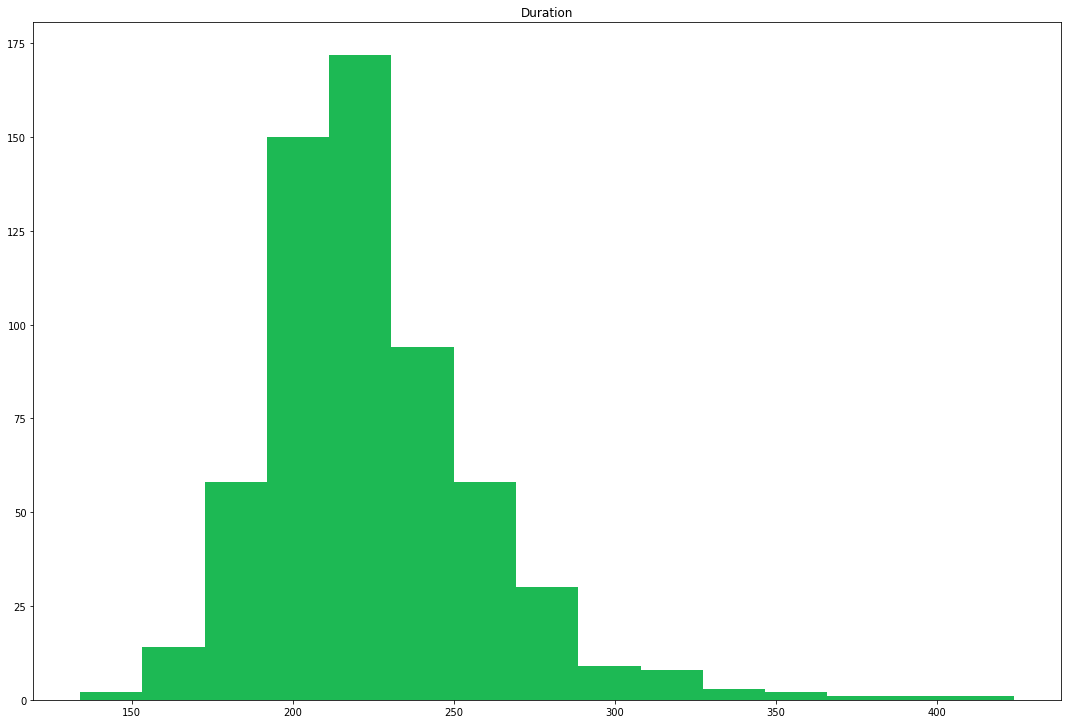

In [11]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["dur"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Duration") #set a title 

**Acousticness**:
Acousticness measures by definition how acoustic a track is. Acousticness is measured on a scale from 0.0 to 1.0. The histogram below shows that the majority of the tracks in the dataset do not have a lot of acoustic elements. 

Text(0.5, 1, 'Acousticness')

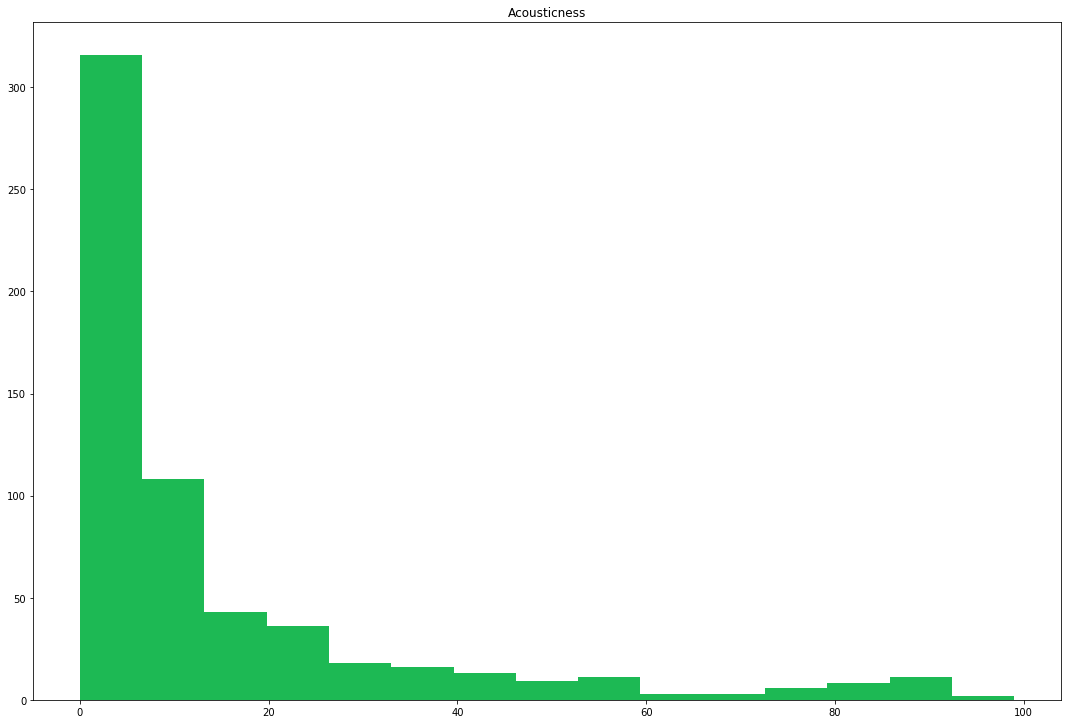

In [12]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["acous"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Acousticness") #set a title 

**Speechiness**:
Speechiness represents the presence of spocen words in a track. Speechiness is measured on a scale from 0.0 to 1.0. A value of 1.0 is achieved, if there are many spoken words in a track (e.g. podcast). Typically, values above 0.66 result from tracks which are probably entirely of spoken words. Values between 0.33 and 0.66 are tracks which contain music as well as spoken words (e.g. rap songs). Values below 0.33 do not include any spoken words. The histogram clarifies that the dataset consists mostly of songs. 

Text(0.5, 1, 'Speechiness')

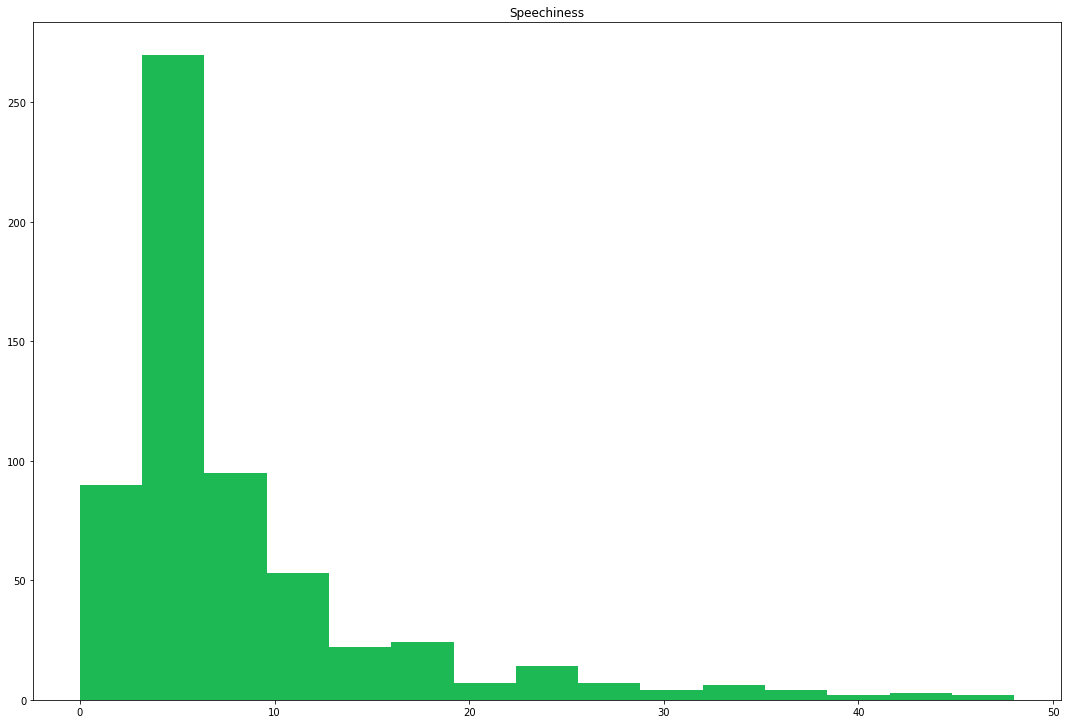

In [13]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["spch"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Speechiness") #set a title 

**Popularity**: 
The last variable measures the popularity of the song. The higher the value the more popular was the song. This variable is treated as the dependent varible in the following analysis. As can be seen, most of the songs were quite popular. 

Text(0.5, 1, 'Popularity')

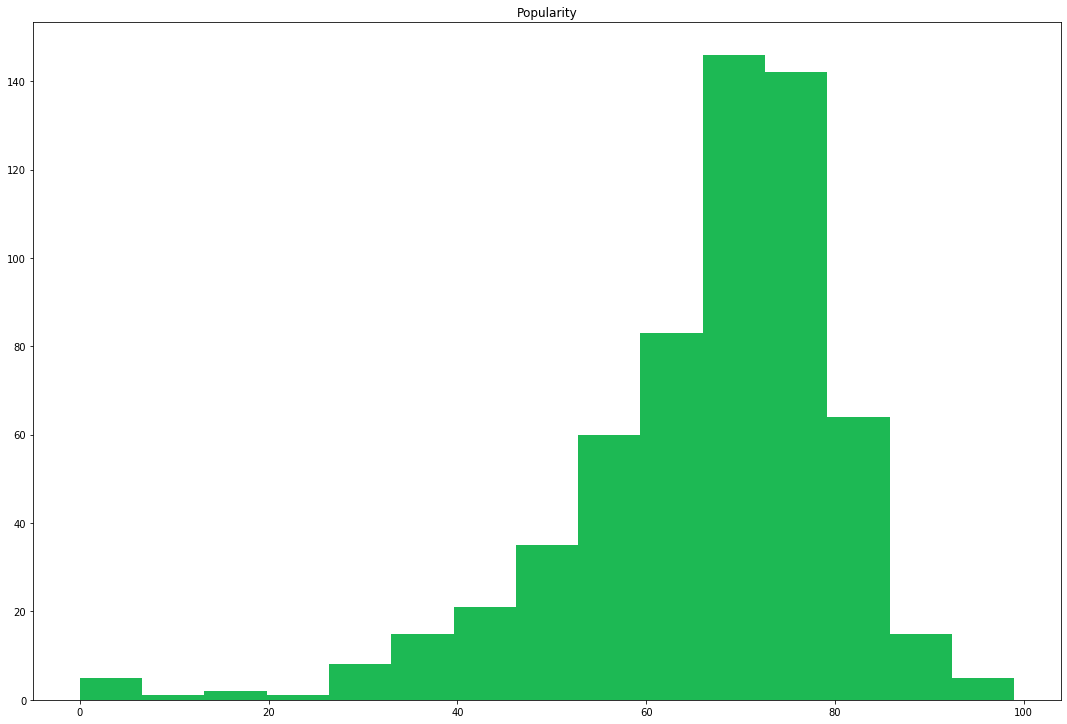

In [14]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["pop"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Popularity") #set a title 

## 3.2. Bivariate Analysis 

### 4.2.1 Correlation Matrix 

The following table shows the correlation between the numeric variables in detail. Since it is quite hard to identify important correlations, colourcoding was used to ease the identification. 

In [16]:
df.corr() # correlation matrix 

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,1.000000,0.989031,-0.114849,-0.214586,0.074920,-0.133914,-0.129865,-0.129002,-0.210783,0.096518,0.013672,0.150420
year,0.989031,1.000000,-0.104247,-0.225596,0.079269,-0.126471,-0.136331,-0.122025,-0.215344,0.101725,0.004778,0.241261
bpm,-0.114849,-0.104247,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983
nrgy,-0.214586,-0.225596,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645
dnce,0.074920,0.079269,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054
dB,-0.133914,-0.126471,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897
live,-0.129865,-0.136331,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749
val,-0.129002,-0.122025,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953
dur,-0.210783,-0.215344,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363
acous,0.096518,0.101725,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704


Text(0.5, 1, 'Correlation between variables')

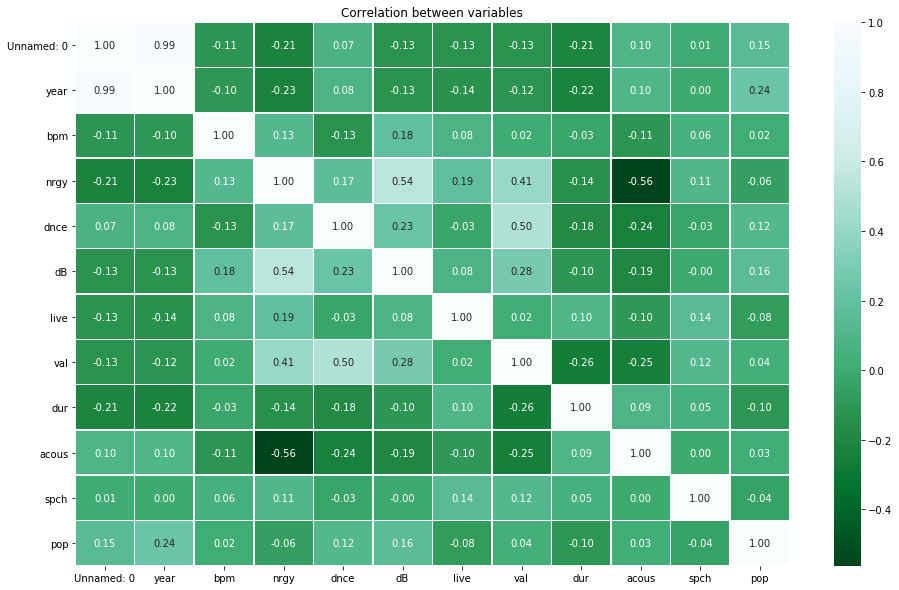

In [20]:
plt.figure(figsize=(16,10)) # plotting a figure and setting the size of the figure 
sn.heatmap(df.corr(), # define the figer format, heatmap based on correlations between variables 
           annot = True, # annot to write the values in the cell 
           fmt = ".2f", # changing format so we get two decimal points
           cmap = "BuGn_r", # mapping from data value to color space  (colourcoding)
           linewidths=.5) # adding a line between each sells for better visual interpretation 
plt.title("Correlation between variables") # setting a title 

## 4.2.2 Correlation between each indpendent variable and popularity

Text(0.5, 1.0, 'Scatterplot: Beats per Minutes and Popularity')

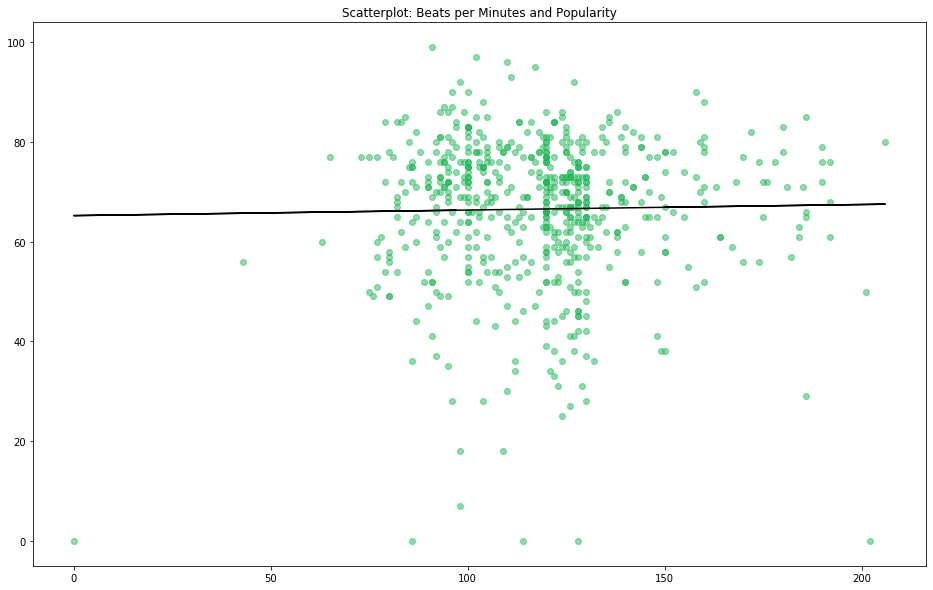

In [19]:
x = df["bpm"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Beats per Minutes and Popularity") # set the title 

The plot shows that between beats per minute and popularity is only a small positive correlation. 

Text(0.5, 1.0, 'Scatterplot: Energy and Popularity')

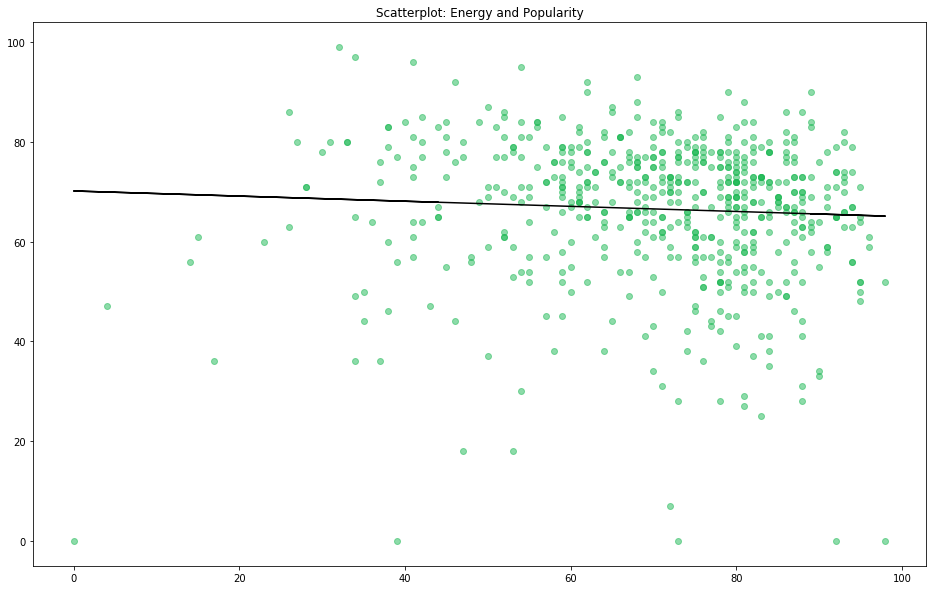

In [20]:
x = df["nrgy"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Energy and Popularity") # set the title 

The plot shows that between Energy and Popularity is a small negative correlation. 

Text(0.5, 1.0, 'Scatterplot: Danceability and Popularity')

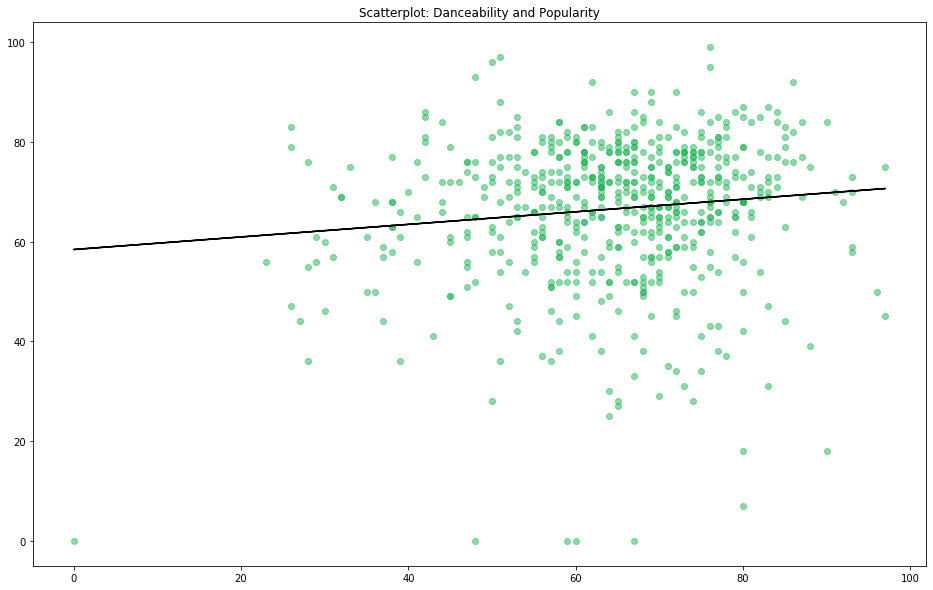

In [21]:
x = df["dnce"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Danceability and Popularity") # set the title 

Text(0.5, 1.0, 'Scatterplot: Loudness and Popularity')

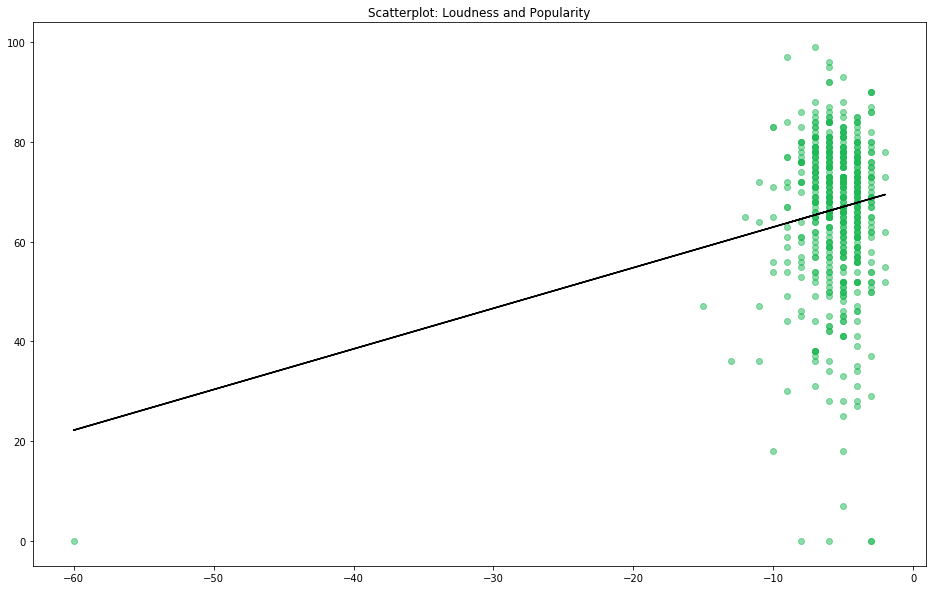

In [22]:
x = df["dB"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Loudness and Popularity") # set the title 

The plot shows that there is an outliers which determines the slope of the fitting line. 

Text(0.5, 1.0, 'Scatterplot: Liveness and Popularity')

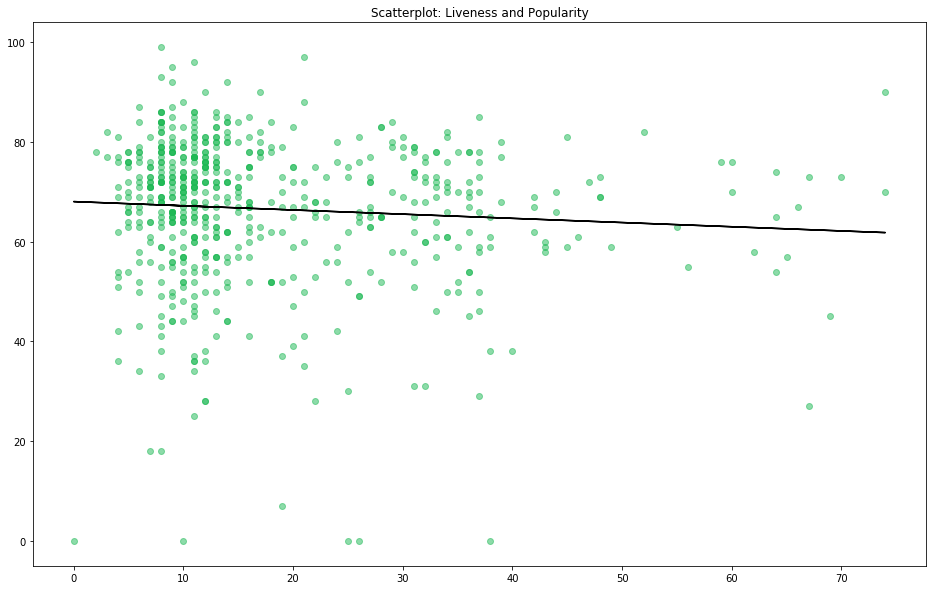

In [23]:
x = df["live"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Liveness and Popularity") # set the title 

There is a small negative correlation between liveness and popularity. 

Text(0.5, 1.0, 'Scatterplot: Valence and Popularity')

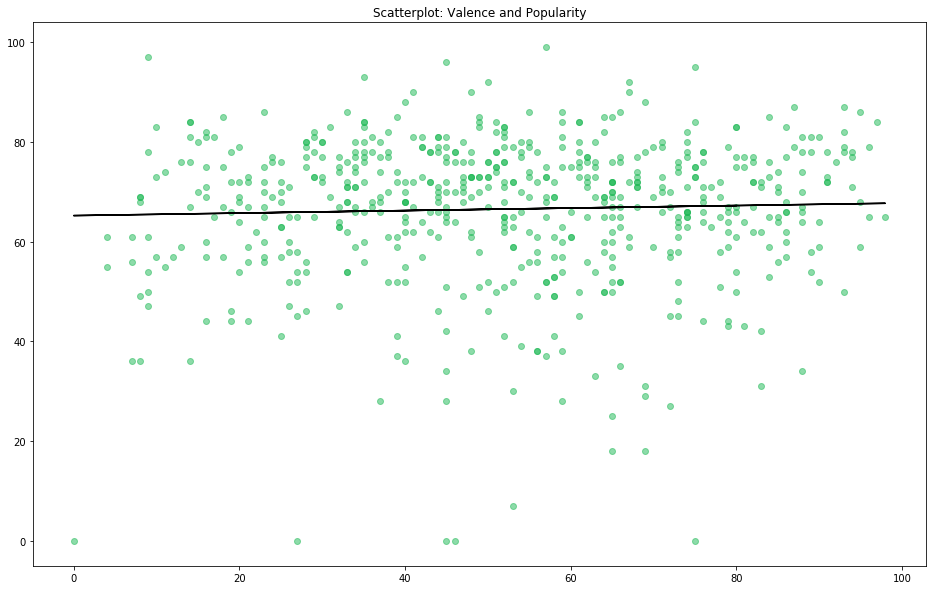

In [24]:
x = df["val"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Valence and Popularity") # set the title 

There is no clear correlation between valence and popularity. 

Text(0.5, 1.0, 'Scatterplot: Durability and Popularity')

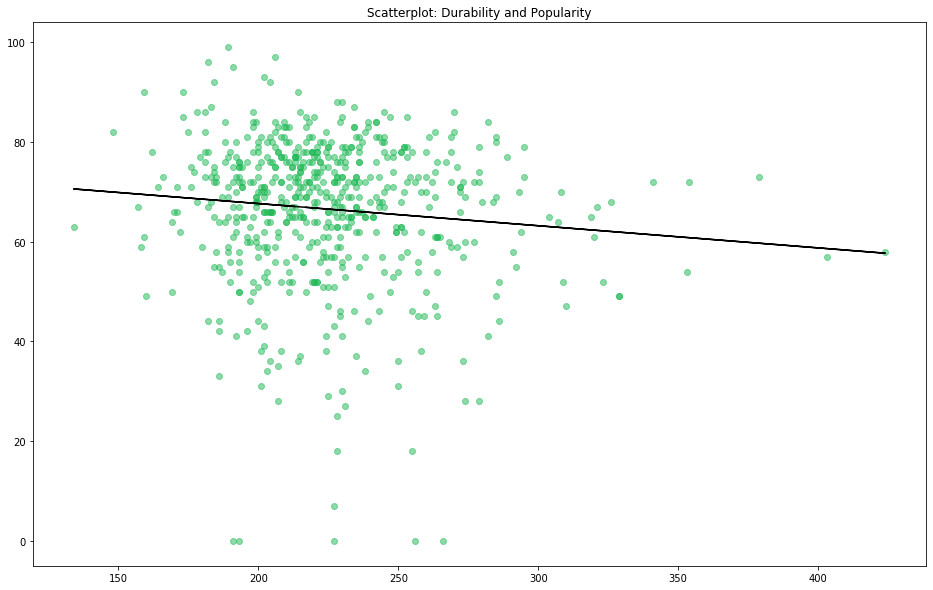

In [65]:
x = df["dur"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Durability and Popularity") # set the title 

There is a negative correlation between durability and popularity. 

Text(0.5, 1.0, 'Scatterplot: Accousticness and Popularity')

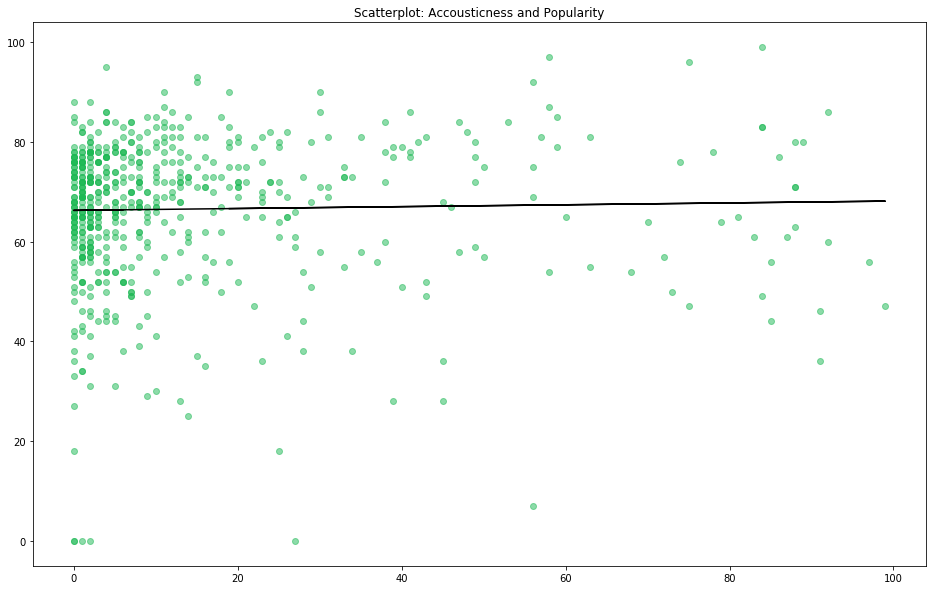

In [66]:
x = df["acous"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Accousticness and Popularity") # set the title 

There is no clear correlation between Accousticness and Popularity. 

Text(0.5, 1.0, 'Scatterplot: Speechiness and Popularity')

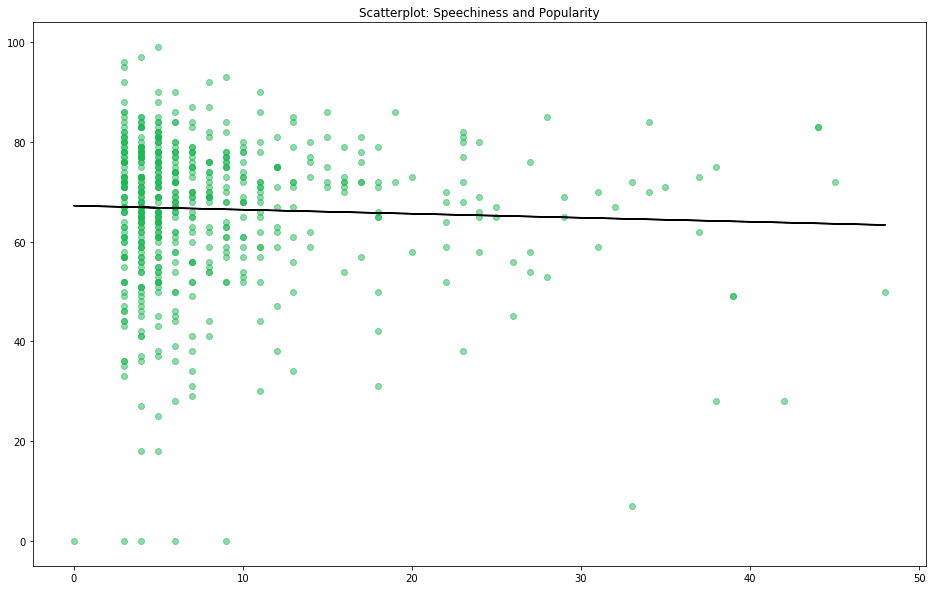

In [67]:
x = df["spch"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Speechiness and Popularity") # set the title 

There is a small negative correlation between speechiness and popularity. 

# 4. Interactive Part 

## 4.1 Interactive Part 

In this section of the code the user can use different commands to interact with the code and search in the database. 

CODE STORAGE FOR SCREEN SIZE WIDTH TO DISPLAY ALL COLUMNS:

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 3000)

TO RESET IF IT FUCKS THE DISPLAY UP:

pd.reset_option("^display")

THIS GIVES BORDERS:

%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [21]:
pd.set_option('display.max_columns', 20) #shows 20 colums 
pd.set_option('display.width', 3000) #makes the display bigger to show tables without truncation

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('top10s.csv', engine='python') # Reading the csv file using pandas, set engine paramaeter to python to avoid parse errors. 
df # print dataframe to get a glimpse on the dataset. 

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [25]:
print("Welcome to the Top Songs of Spotifiy, a database of 603 songs from 2010 to 2019.\n")
print("Here you can perform multiple types of searches within the database.\nATTENTION: CAPITALIZE THE FIRST LETTER OF EVERY WORD AND NAME\n")

#user_input variable attributes the different search functions
user_input = input("What do you want to search for?\n    1: Search for information about an artist \n    2: Search for the Top Song ranking of a year\n    3: Search for information about a song\n    Please enter the corresponding number: ")

if user_input == "1":
    df1 = df.loc[:, ['artist', 'title','year', 'top genre']] #defines a subframe of df with only the artist, title, year and genre columns to ease comprehension
    print("\nARTIST SEARCH FUNCTION\n")
    search_1 = input("Enter an artist's name (or part of a name) to see their songs: ") 
    print("\n")
    print(df1[df1['artist'].str.contains(search_1)]) #searches for any sub-string containing the input string in the artist column in the df1 subframe
    
if user_input == "2":
    df2 = df.loc[:, ['artist', 'title','year']] #defines a subframe of df with only artist title and year columns
    print('\nTOP SONG RANKING DISPLAY SEARCH FUNCTION (2010-2019)\n')
    search_2 = int(input('Which year\'s ranking do you want to display? ')) #input variable for the year to be displayed
    print("\n")
    pd.set_option('display.max_rows', None) 
    print(df2.loc[df2['year'] == search_2]) #searches within df2 for all rows containing the year input in the search_2 variable and prints them
    
if user_input == "3":
    df3 = df.loc[:, ['title','artist','year','top genre','pop']]
    print("\nSONG SEARCH FUNCTION\n")
    search_3 = input("Enter a song's name (or part of a name) to see information about it: ")
    print("\n")
    df.sort_values(by='year', ascending=True) #displays the oldest songs first which contain the string 
    print("Here are the song(s) matching your query. The 'pop' column represents the song's popularity over a 100.\n")
    print(df3[df3['title'].str.contains(search_3)]) #searches for the input string within the title column



Welcome to the Top Songs of Spotifiy, a database of 603 songs from 2010 to 2019.

Here you can perform multiple types of searches within the database.
ATTENTION: CAPITALIZE THE FIRST LETTER OF EVERY WORD AND NAME

What do you want to search for?
    1: Search for information about an artist 
    2: Search for the Top Song ranking of a year
    3: Search for information about a song
    Please enter the corresponding number: 1

ARTIST SEARCH FUNCTION

Enter an artist's name (or part of a name) to see their songs: Ed


         artist                                              title  year top genre
268  Ed Sheeran                                  Thinking out Loud  2015       pop
292  Ed Sheeran                                              Don't  2015       pop
302  Ed Sheeran                                               Sing  2015       pop
345  Ed Sheeran                                        Bloodstream  2015       pop
443  Ed Sheeran                                       Shape of

# 5. Regression Analysis 

## 5.1 The Multiple Regression Model 

In this section we will try to create a regression Model with the data given in the dataset. The goal will be trying to predict the popularity of a song with its attributes. At first we will do a regression model and create a tool to predict a songs popularity by using value inputs for the independent variables. 

In [ ]:
import pandas as pd
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df = pd.read_csv('top10s.csv', engine='python') 

# define independent and dependent variables
X = df[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch']].astype(float) 
Y = df['pop'].astype(float) 

# create a linear regression
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# show Intercept, Coefficients and R Squared
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('R Squared: \n', regr.score(X, Y))

# tkinter GUI
root= tk.Tk() 

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# show intercept
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(220, 225, window=label_Intercept)

# show coefficients 
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(220, 250, window=label_Coefficients)

# New_bpm label and input box
label1 = tk.Label(root, text=' Enter bpm value: ')
canvas1.create_window(50, 10, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(220, 10, window=entry1)

# New_nrgy label and input box
label2 = tk.Label(root, text=' Enter nrgy value: ')
canvas1.create_window(50, 30, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(220, 30, window=entry2)

# New_dnce label and input box
label3 = tk.Label(root, text=' Enter dnce value: ')
canvas1.create_window(50, 50, window=label3)

entry3 = tk.Entry (root) # create 3rd entry box
canvas1.create_window(220, 50, window=entry3)

# New_dB label and input box
label4 = tk.Label(root, text=' Enter dB value: ')
canvas1.create_window(50, 70, window=label4)

entry4 = tk.Entry (root) # create 4th entry box
canvas1.create_window(220, 70, window=entry4)

# New_live label and input box
label5 = tk.Label(root, text=' Enter live value: ')
canvas1.create_window(50, 90, window=label5)

entry5 = tk.Entry (root) # create 5th entry box
canvas1.create_window(220, 90, window=entry5)

# New_val label and input box
label6 = tk.Label(root, text=' Enter val value: ')
canvas1.create_window(50, 110, window=label6)

entry6 = tk.Entry (root) # create 6th entry box
canvas1.create_window(220, 110, window=entry6)

# New_dur label and input box
label7 = tk.Label(root, text=' Enter dur value: ')
canvas1.create_window(50, 130, window=label7)

entry7 = tk.Entry (root) # create 7th entry box
canvas1.create_window(220, 130, window=entry7)

# New_acous label and input box
label8 = tk.Label(root, text=' Enter acous value: ')
canvas1.create_window(50, 150, window=label8)

entry8 = tk.Entry (root) # create 8th entry box
canvas1.create_window(220, 150, window=entry8)

# New_spch label and input box
label9 = tk.Label(root, text=' Enter spch value: ')
canvas1.create_window(50, 170, window=label9)

entry9 = tk.Entry (root) # create 9th entry box
canvas1.create_window(220, 170, window=entry9)

# define new variables
def values(): 
    global New_bpm # 1st input variable
    New_bpm = float(entry1.get()) 
    
    global New_nrgy # 2nd input variable
    New_nrgy = float(entry2.get()) 
    
    global New_dnce # 3rd input variable
    New_dnce = float(entry3.get())
    
    global New_dB #our 4th input variable
    New_dB = float(entry4.get())
    
    global New_live # 5th input variable
    New_live = float(entry5.get())
    
    global New_val # 6th input variable
    New_val = float(entry6.get())
    
    global New_dur # 7th input variable
    New_dur = float(entry7.get())
    
    global New_acous # 8th input variable
    New_acous = float(entry8.get())
    
    global New_spch # 9th input variable
    New_spch = float(entry9.get())
    
    # use new variable inputs to predict popularity
    Prediction_result  = ('Predicted Pop: ', regr.predict([[New_bpm ,New_nrgy ,New_dnce ,New_dB ,New_live ,New_val ,New_dur ,New_acous ,New_spch]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='pink')
    canvas1.create_window(220, 280, window=label_Prediction)

    # button to call the 'values' command above 
button1 = tk.Button (root, text='Predict Popularity',command=values, bg='pink') 
canvas1.create_window(220, 200, window=button1)
 
#plot 1st scatter 
figure1 = plt.Figure(figsize=(3,2), dpi=50)
ax1 = figure1.add_subplot(111)
ax1.scatter(df['bpm'].astype(float),df['pop'].astype(float), color = 'g')
scatter1 = FigureCanvasTkAgg(figure1, root) 
scatter1.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax1.legend(['pop']) 
ax1.set_xlabel('bpm')
ax1.set_title('bpm Vs. pop')

#plot 2nd scatter 
figure2 = plt.Figure(figsize=(3,2), dpi=50)
ax2 = figure2.add_subplot(111)
ax2.scatter(df['nrgy'].astype(float),df['pop'].astype(float), color = 'g')
scatter2 = FigureCanvasTkAgg(figure2, root) 
scatter2.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax2.legend(['pop']) 
ax2.set_xlabel('nrgy')
ax2.set_title('nrgy Vs. pop')

#plot 3rd scatter 
figure3 = plt.Figure(figsize=(3,2), dpi=50)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['dnce'].astype(float),df['pop'].astype(float), color = 'g')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['pop']) 
ax3.set_xlabel('dnce')
ax3.set_title('dnce Vs. pop')

#plot 4th scatter 
figure4 = plt.Figure(figsize=(3,2), dpi=50)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['dB'].astype(float),df['pop'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['pop']) 
ax4.set_xlabel('dB')
ax4.set_title('dB Vs. pop')

#plot 5th scatter 
figure5 = plt.Figure(figsize=(3,2), dpi=50)
ax5 = figure5.add_subplot(111)
ax5.scatter(df['live'].astype(float),df['pop'].astype(float), color = 'g')
scatter5 = FigureCanvasTkAgg(figure5, root) 
scatter5.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax5.legend(['pop']) 
ax5.set_xlabel('live')
ax5.set_title('live Vs. pop')

#plot 6th scatter 
figure6 = plt.Figure(figsize=(3,2), dpi=50)
ax6 = figure6.add_subplot(111)
ax6.scatter(df['val'].astype(float),df['pop'].astype(float), color = 'g')
scatter6 = FigureCanvasTkAgg(figure6, root) 
scatter6.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax6.legend(['pop']) 
ax6.set_xlabel('val')
ax6.set_title('val Vs. pop')

#plot 7th scatter 
figure7 = plt.Figure(figsize=(3,2), dpi=50)
ax7 = figure7.add_subplot(111)
ax7.scatter(df['dur'].astype(float),df['pop'].astype(float), color = 'g')
scatter7 = FigureCanvasTkAgg(figure7, root) 
scatter7.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax7.legend(['pop']) 
ax7.set_xlabel('dur')
ax7.set_title('dur Vs. pop')

#plot 8th scatter 
figure8 = plt.Figure(figsize=(3,2), dpi=50)
ax8 = figure8.add_subplot(111)
ax8.scatter(df['acous'].astype(float),df['pop'].astype(float), color = 'g')
scatter8 = FigureCanvasTkAgg(figure8, root) 
scatter8.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax8.legend(['pop']) 
ax8.set_xlabel('acous')
ax8.set_title('acous Vs. pop')

#plot 9th scatter 
figure9 = plt.Figure(figsize=(3,2), dpi=50)
ax9 = figure9.add_subplot(111)
ax9.scatter(df['spch'].astype(float),df['pop'].astype(float), color = 'g')
scatter9 = FigureCanvasTkAgg(figure9, root) 
scatter9.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax9.legend(['pop']) 
ax9.set_xlabel('spch')
ax9.set_title('spch Vs. pop')


root.mainloop()

Intercept: 
 91.94282688762436
Coefficients: 
 [ 0.00555795 -0.19782577  0.08273298  1.28581571 -0.051513   -0.00558831
 -0.03885691 -0.02099692 -0.00574637]
R Squared: 
 0.0727606471511052


### 5.1.1 Results of the Multiple Regression Model 

The code gives us the Intercept and the Coefficients of the regression. Additionally it enables us to predict values by using value inputs. However as the R Squared value equals 0.0727 only roughly 7.27% of Y's Variance is explained by the independent variables. Thus it can be assumed that his model is inaccurate. For this reason we will analyse if there is a time effect which influences the accuracy of the model. Therefore, additional regression models will be created by isolating data from specific years. 

## 5.2 Determinants of Popularity over Time 

In [3]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv('top10s.csv', engine='python') 
years = df.year.unique()

#set index
df = df.set_index('year')

#function to create a linear regression
def create_regression(X,y):
    
    X = df1[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch']].astype(float) 
    Y = df1['pop'].values 

    regressor = LinearRegression()  
    regressor.fit(X, Y)
    
    return regressor


In [4]:
from sklearn.metrics import r2_score
df1 = df.loc[2010,:] #slicing only data from 2010 
X = df1[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch']].astype(float) 
y = df1['pop'].values 

regressor = create_regression(X,y)

print('Intercept:',regressor.intercept_)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
print('R Squared: \n', regressor.score(X, y))

Intercept: 13.16657694442717
       Coefficient
bpm       0.038525
nrgy     -0.149665
dnce      0.181858
dB       -2.072549
live      0.012248
val       0.245779
dur       0.090588
acous     0.147582
spch     -0.073383
R Squared: 
 0.1854610880537585


In [5]:
df1 = df.loc[2014,:] #slicing only data from 2013 
X = df1[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch']].astype(float) 
y = df1['pop'].values 

regressor = create_regression(X,y)

print('Intercept:',regressor.intercept_)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
print('R Squared: \n', regressor.score(X, y))

Intercept: 93.7709914679631
       Coefficient
bpm       0.094186
nrgy     -0.134569
dnce     -0.184927
dB        0.617794
live     -0.472033
val       0.139166
dur      -0.059729
acous    -0.121440
spch     -0.226186
R Squared: 
 0.17339621408793626


In [6]:
df1 = df.loc[2018,:] #slicing only data from 2015
X = df1[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch']].astype(float) 
y = df1['pop'].values 

regressor = create_regression(X,y)

print('Intercept:',regressor.intercept_)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
print('R Squared: \n', regressor.score(X, y))

Intercept: 89.18673696774455
       Coefficient
bpm       0.055150
nrgy     -0.154976
dnce     -0.001975
dB        2.252723
live      0.153551
val       0.077546
dur      -0.018819
acous     0.036186
spch     -0.282292
R Squared: 
 0.16228633274333215


### 5.2.1 Results Multiple Regression Model accounting for time effects 

As the regression models show strongly differing values for the intercept as well as for the coefficients we can assume that there is a time effect influencing the model. Thus the inacurracy of the model from previous section fails to succesfully predict the popularity as creating a regression over the entire time span creates errors as well. For further analysis this time effect could be observed closer to create a model which allows to predict popularity more accuratily.

# 6. Conclusion

 * Are there hidden patterns in the data regarding the different characteristics of a track? 
 * Which determinants explain the popularity of songs? 
 * Have any dynamics changed over time? 